In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Importation du Dataset et visualisation

In [2]:
pd.set_option('display.max_rows', 20)  # Set to None for displaying all rows
pd.set_option('display.max_columns', None)  # Set to None for displaying all columns

dataset = "Dataset2.csv"
dataset2 = pd.read_csv(dataset)
dataset2

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,5/30/2021,6/19/2021,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,3/28/2021,4/17/2021,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2/6/2022,2/26/2022,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,6/20/2021,7/10/2021,14.0,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,1-May,21-May,165.0,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,24-Jul,13-Aug,150.0,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,12-Jun,2-Jul,219.0,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,28-Jun,18-Jul,53.0,1379.0,61.0,10.9,282.8,4.4


Description globale du Dataset

In [3]:
def description(dataset):
    nb_lignes=dataset.shape[0] #nombre de lignes
    nb_colonnes=dataset.shape[1] #nombre de colonnes
    attributs=dataset.columns #les attributs du Dataset
    type_attributs=dataset.dtypes #type de chaque attribut
    val_uniques=[]
    min_vals=[]
    max_vals=[]
    null_vals=[]
    for attribut in attributs:
        val= len(dataset[attribut].unique()) #le nombre des valeurs uniques de chaque attribut
        val_uniques.append(val)
        min_vals.append(dataset[attribut].min())
        max_vals.append(dataset[attribut].max())
        null_vals.append(dataset[attribut].isnull().sum())
    description=pd.DataFrame({"attributs":attributs,"type_attributs":type_attributs.tolist(),"valeurs_uniques":val_uniques,"null values":null_vals,"min":min_vals,"max":max_vals},index=range(nb_colonnes))
    return description
    

In [4]:
desc=description(dataset2)
desc

,attributs,type_attributs,valeurs_uniques,null values,min,max
0,zcta,int64,7,0,94085,95129
1,time_period,int64,51,0,18,155
2,population,int64,7,0,23223,79655
3,Start date,object,99,0,1-Aug,9/4/2022
4,end date,object,99,0,1-Feb,9/3/2022
5,case count,float64,205,26,0.0,3627.0
6,test count,float64,321,12,11.0,20177.0
7,positive tests,float64,210,27,11.0,35000.0
8,case rate,float64,209,0,0.0,260.7
9,test rate,float64,323,0,0.1,1615.1


In [5]:
# Dates are formatted as strings, they are available in two forms "%M/%d/%Y" or "%d-%b"
dataset2['Start date']

0      10/11/2020
1       5/30/2021
2       3/28/2021
3        2/6/2022
4       6/20/2021
          ...    
332         1-May
333        24-Jul
334        12-Jun
335        28-Jun
336        20-Mar
Name: Start date, Length: 337, dtype: object

checking the number time periods registered for each zcta

In [6]:
import pandas as pd
import plotly.graph_objs as go

# Assuming dataset2.groupby('zcta')['time_period'] is the SeriesGroupBy object
grouped_data = dataset2.groupby('zcta')['time_period']

# Converting the grouped data to a DataFrame for visualization
grouped_df = grouped_data.count().reset_index()

# Display the DataFrame using Plotly's table functionality
fig = go.Figure(data=[go.Table(
    header=dict(values=list(grouped_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[grouped_df['zcta'], grouped_df['time_period']],
               fill_color='lavender',
               align='left'))
])

fig.show()


In [7]:
import pandas as pd
import plotly.graph_objs as go

# Assuming dataset2.groupby('zcta')['time_period'] is the SeriesGroupBy object
grouped_data = dataset2.groupby('zcta')['time_period']

# Concatenating time periods for each zcta
grouped_time_periods = grouped_data.apply(lambda x: ', '.join(x.astype(str))).reset_index(name='time_periods')

# Displaying the DataFrame using Plotly's table functionality
fig = go.Figure(data=[go.Table(
    header=dict(values=list(grouped_time_periods.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[grouped_time_periods['zcta'], grouped_time_periods['time_periods']],
               fill_color='lavender',
               align='left'))
])

fig.show()


checking the periods of time (start date - end date) covered by each time period

In [8]:
time_periods = dataset2.groupby('time_period')[['Start date','end date']].agg({'Start date': 'min', 'end date': 'max'}).reset_index()
time_periods


,time_period,Start date,end date
0,18,12/22/2019,11-Jan
1,19,1/12/2020,2/1/2020
2,20,2-Feb,22-Feb
3,21,2/23/2020,3/14/2020
4,22,15-Mar,4/4/2020
...,...,...,...
46,64,14-Aug,9/3/2022
47,65,4-Sep,9/24/2022
48,66,25-Sep,15-Oct
49,67,10/16/2022,5-Nov


Viewing the 7 available zones

In [9]:
dataset2['zcta'].unique()

array([95129, 95128, 95127, 95035, 94087, 94086, 94085], dtype=int64)

## Prétraitement du Dataset

convert dates to the appropriate date

In [10]:
def parse_date(date):
    try:
        return pd.to_datetime(date,format='%m/%d/%Y')
    except ValueError:
        try:
            return pd.to_datetime(date,format='%d/%m/%Y')
        except ValueError:
            try:
                return pd.to_datetime(date,format='%d-%b')
            except ValueError:
                return pd.NaT

In [11]:
convert_start_dates = dataset2['Start date'].apply(parse_date)
convert_end_dates = dataset2['end date'].apply(parse_date)
#get months present for each year
year_months = [(f'{x.month}-{x.year}',f'{y.month}-{y.year}') for  x,y in zip((convert_start_dates),convert_end_dates)]
# sorted_year_months = sorted(year_months,key=lambda x: (int(x[0].split('-')[1]), int(x[0].split('-')[0])))
unique_y_m_combo=sorted(set(year_months),key=lambda x: ((int(x[0].split('-')[1]), int(x[0].split('-')[0]),(int(x[1].split('-')[1]), int(x[1].split('-')[0])))))



In [12]:
unique_y_m_combo

[('1-1900', '1-1900'),
 ('1-1900', '2-1900'),
 ('2-1900', '2-1900'),
 ('2-1900', '3-1900'),
 ('3-1900', '3-1900'),
 ('3-1900', '4-1900'),
 ('4-1900', '4-1900'),
 ('4-1900', '5-1900'),
 ('5-1900', '5-1900'),
 ('5-1900', '6-1900'),
 ('6-1900', '6-1900'),
 ('6-1900', '7-1900'),
 ('7-1900', '7-1900'),
 ('7-1900', '8-1900'),
 ('8-1900', '8-1900'),
 ('8-1900', '9-1900'),
 ('9-1900', '9-1900'),
 ('9-1900', '10-1900'),
 ('10-1900', '10-1900'),
 ('10-1900', '11-1900'),
 ('11-1900', '11-1900'),
 ('11-1900', '12-1900'),
 ('12-1900', '1-1900'),
 ('12-1900', '12-1900'),
 ('12-2019', '1-2020'),
 ('1-2020', '2-2020'),
 ('2-2020', '3-2020'),
 ('3-2020', '4-2020'),
 ('4-2020', '4-2020'),
 ('4-2020', '5-2020'),
 ('5-2020', '6-2020'),
 ('6-2020', '6-2020'),
 ('6-2020', '7-2020'),
 ('7-2020', '8-2020'),
 ('8-2020', '8-2020'),
 ('8-2020', '9-2020'),
 ('9-2020', '10-2020'),
 ('10-2020', '10-2020'),
 ('11-2020', '11-2020'),
 ('11-2020', '12-2020'),
 ('12-2020', '1-2021'),
 ('1-2021', '1-2021'),
 ('1-2021', '

In [13]:
dataset2['Start date'] = convert_start_dates
dataset2['end date'] = convert_end_dates

In [14]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   zcta             337 non-null    int64         
 1   time_period      337 non-null    int64         
 2   population       337 non-null    int64         
 3   Start date       337 non-null    datetime64[ns]
 4   end date         337 non-null    datetime64[ns]
 5   case count       311 non-null    float64       
 6   test count       325 non-null    float64       
 7   positive tests   310 non-null    float64       
 8   case rate        337 non-null    float64       
 9   test rate        337 non-null    float64       
 10  positivity rate  337 non-null    float64       
dtypes: datetime64[ns](2), float64(6), int64(3)
memory usage: 29.1 KB


In [15]:
#verify the periods between start date and end date
period=dataset2['end date']-dataset2['Start date']
print(set(list(period)))

{Timedelta('20 days 00:00:00'), Timedelta('-345 days +00:00:00'), Timedelta('19 days 00:00:00')}


In [16]:
#verify where the start date is greater than the end date
dataset2[dataset2['end date']-dataset2['Start date']<pd.Timedelta(0)]

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
235,94087,53,56668,1900-12-26,1900-01-15,1659.0,16561.0,1951.0,139.4,1391.6,11.8
237,94087,35,56668,1900-12-13,1900-01-02,350.0,7249.0,396.0,29.4,609.1,5.5
260,94086,18,50477,1900-12-22,1900-01-11,0.0,NaN,NaN,0.0,0.1,0.0
284,94086,53,50477,1900-12-26,1900-01-15,1347.0,11252.0,1523.0,127.1,1061.5,13.5
285,94086,35,50477,1900-12-13,1900-01-02,453.0,6030.0,496.0,42.7,568.9,8.2
314,94085,18,23223,1900-12-22,1900-01-11,0.0,NaN,NaN,0.0,0.2,100.0
318,94085,35,23223,1900-12-13,1900-01-02,231.0,3296.0,261.0,47.4,675.8,7.9
324,94085,53,23223,1900-12-26,1900-01-15,891.0,5880.0,1051.0,182.7,1205.7,17.9


In [17]:
# the negative period results are due to converting the dates without a year and assigning the year 1900 by default
# replace dates with missing years with the years of the same time period
for index, row in dataset2.iterrows():
    if row['Start date'].year == 1900:
        valid_year = dataset2.loc[(dataset2['time_period']== row['time_period']) & (dataset2['Start date'].dt.year != 1900)]['Start date'].dt.year
        if len(valid_year) > 0:
            dataset2.at[index, 'Start date'] = row['Start date'].replace(year=valid_year.iloc[0])
    if row['end date'].year == 1900:
        valid_year = dataset2.loc[(dataset2['time_period']== row['time_period']) & (dataset2['end date'].dt.year != 1900)]['end date'].dt.year
        if len(valid_year) > 0:
            dataset2.at[index, 'end date'] = row['end date'].replace(year=valid_year.iloc[0])

        

In [18]:
# verify the periods between start date and end date
# the period is correct
period=dataset2['end date'] - dataset2['Start date']
print(set(list(period)))

{Timedelta('20 days 00:00:00')}


In [19]:
dataset2

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11,2020-10-31,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,2021-05-30,2021-06-19,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,2021-03-28,2021-04-17,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2022-02-06,2022-02-26,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,2021-06-20,2021-07-10,14.0,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,2022-05-01,2022-05-21,165.0,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,2022-07-24,2022-08-13,150.0,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,2022-06-12,2022-07-02,219.0,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,2020-06-28,2020-07-18,53.0,1379.0,61.0,10.9,282.8,4.4


global trend of case count over periods

<Axes: xlabel='time period', ylabel='case count'>

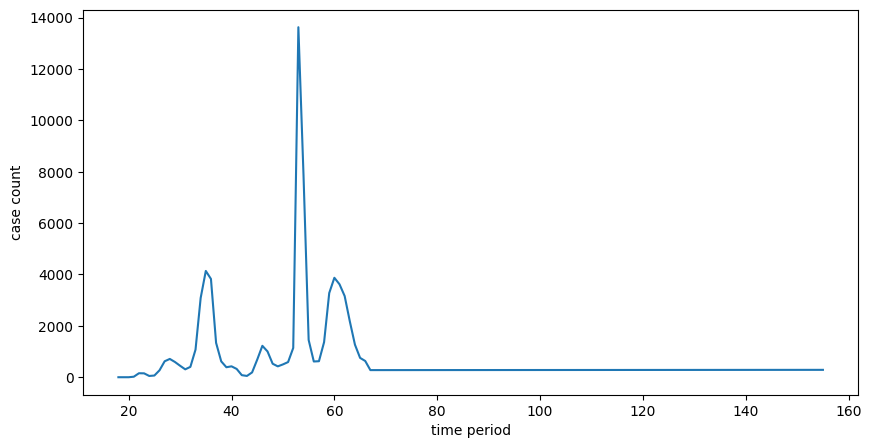

In [20]:
dataset2.sort_values(by='time_period').groupby('time_period')['case count'].sum().plot(x='time_period', y='case count',figsize=(10,5),kind='line',ylabel='case count',xlabel='time period')

global trend of test count over periods

<Axes: xlabel='time period', ylabel='test count'>

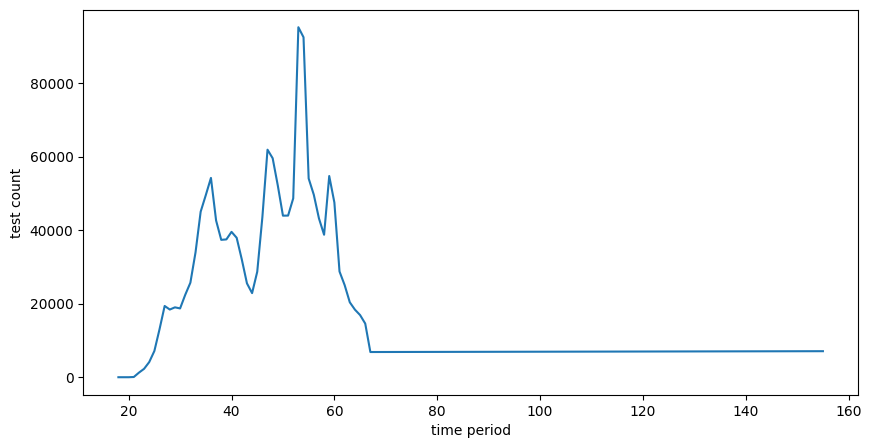

In [21]:
dataset2.sort_values(by='time_period').groupby('time_period')['test count'].sum().plot(x='time_period', y='test count',figsize=(10,5),kind='line',ylabel='test count',xlabel='time period')

global trend of positive tests over periods

<Axes: xlabel='time period', ylabel='positive tests'>

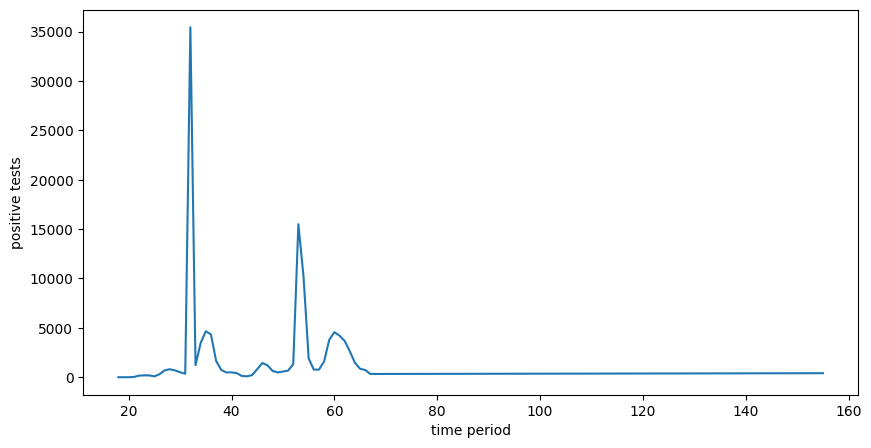

In [22]:
dataset2.sort_values(by='time_period').groupby('time_period')['positive tests'].sum().plot(x='time_period', y='positive tests',figsize=(10,5),kind='line',ylabel='positive tests',xlabel='time period')

<Axes: xlabel='time period', ylabel='test rate'>

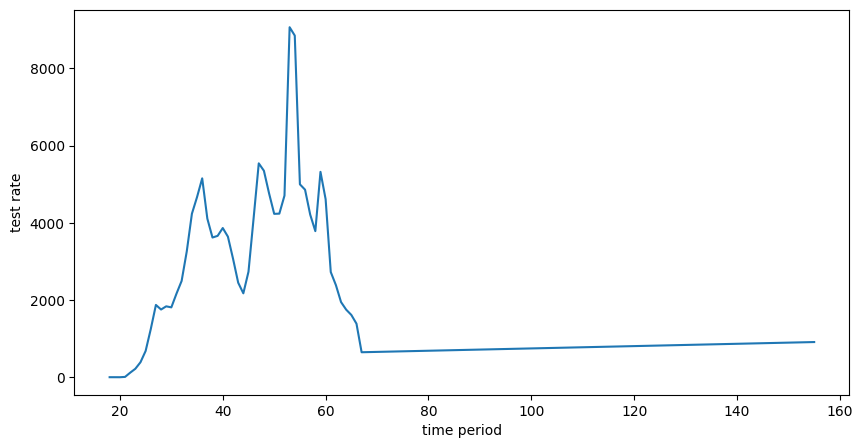

In [123]:
dataset2.sort_values(by='time_period').groupby('time_period')['test rate'].sum().plot(x='time_period', y='test rate',figsize=(10,5),kind='line',ylabel='test rate',xlabel='time period')

Test rate trend is similar to test count and the same applies to case count and case rate also positive test and case count

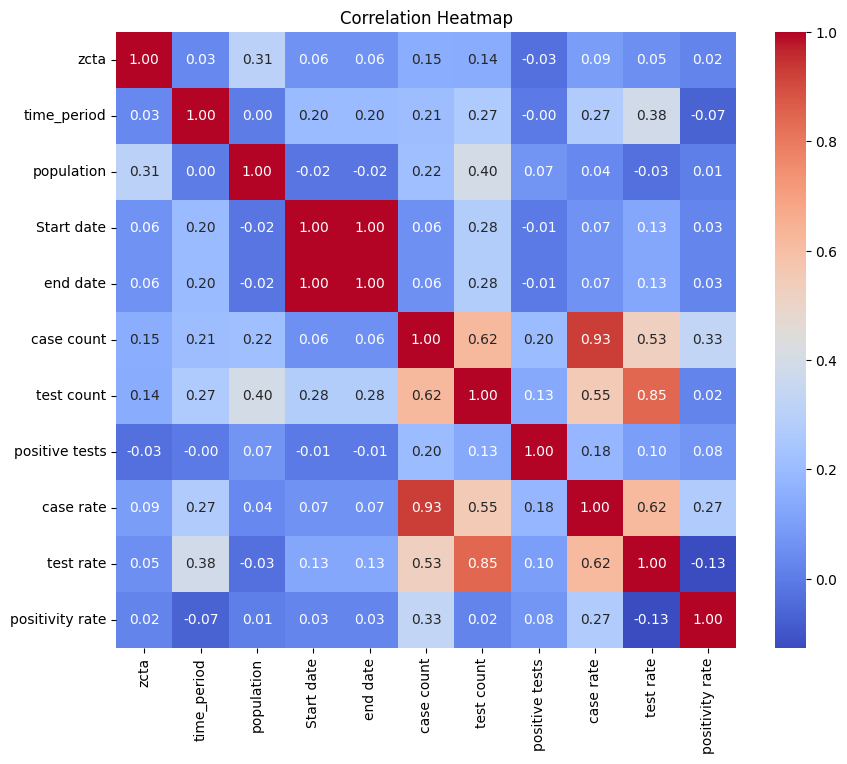

In [23]:
# Plotting the correlation heatmap
correlation_matrix = dataset2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('./assets_2/correlation_heatmap.png')
plt.show()

#### Elimination des redondances

In [24]:
#dataset2.duplicated()
dataset2.drop_duplicates()

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11,2020-10-31,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,2021-05-30,2021-06-19,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,2021-03-28,2021-04-17,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2022-02-06,2022-02-26,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,2021-06-20,2021-07-10,14.0,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,2022-05-01,2022-05-21,165.0,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,2022-07-24,2022-08-13,150.0,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,2022-06-12,2022-07-02,219.0,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,2020-06-28,2020-07-18,53.0,1379.0,61.0,10.9,282.8,4.4


### Calcule des tendances centrales

In [25]:
def moy_attribut(val_att):
    n=len(val_att)
    moy=sum(val_att)/n
    return moy

def mediane_attribut(val_att):
    n=len(val_att)
    sort_val=sorted(val_att)
    if n%2==1:
        mediane=sort_val[(n//2)]
    else: 
        mediane=(sort_val[n//2]+sort_val[(n//2)-1])/2
    return mediane

def mod_attribut(val_att):
    val_att=[val for val in val_att if not pd.isnull(val)]
    sort_val=sorted(val_att)
    Mod={}
    for val in sort_val:
        if(val in Mod):
            Mod[val]+=1
        else:
            Mod[val]=1
            
    Max=max(Mod.values())
    mod = [clé for clé, valeur in Mod.items() if valeur == Max] 
    return mod

def tendance_centrale(dataset,attribut):
        val_att=dataset[attribut]
        if val_att.dtype == 'int64' or val_att.dtype == 'float64':
            moy=moy_attribut(val_att)
        else:
            moy=float('nan')
        mediane=mediane_attribut(val_att)
        mod=mod_attribut(val_att)
        
        return moy,mediane,mod

In [26]:
moy_list=[]
mediane_list=[]
mod_list=[]
q3_list=[]
q1_list=[]
for col in dataset2.columns:
    if col != 'zcta':
        moy,mediane,mod=tendance_centrale(dataset2,col)
        moy_list.append(moy)
        mediane_list.append(mediane)
        mod_list.append(mod)
        q3_list.append(dataset2[col].quantile(0.75))
        q1_list.append(dataset2[col].quantile(0.25))
pd.DataFrame({'attribut':dataset2.columns[1:],'moyenne':moy_list,'mediane':mediane_list,'mode':mod_list,'q3':q3_list,'q1':q1_list})
       
    

,attribut,moyenne,mediane,mode,q3,q1
0,time_period,43.694362,43,"[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 3...",56.0,31.0
1,population,50260.548961,50477,"[23223, 50477]",66256.0,36975.0
2,Start date,NaN,2021-05-30 00:00:00,"[2020-02-23 00:00:00, 2020-03-15 00:00:00, 202...",2022-02-06 00:00:00,2020-09-20 00:00:00
3,end date,NaN,2021-06-19 00:00:00,"[2020-03-14 00:00:00, 2020-04-04 00:00:00, 202...",2022-02-26 00:00:00,2020-10-10 00:00:00
4,case count,NaN,16.0,[0.0],235.0,39.5
5,test count,NaN,9771.0,"[1295.0, 2251.0, 2497.0, 2747.0, 6659.0]",6659.0,2428.0
6,positive tests,NaN,16.0,"[20.0, 47.0, 63.0]",282.0,47.25
7,case rate,19.390504,8.1,[0.0],19.1,3.3
8,test rate,454.838872,427.1,[0.1],614.9,249.7
9,positivity rate,5.827596,3.0,[1.1],6.6,1.3


### Traitement des valeurs inconsistantes

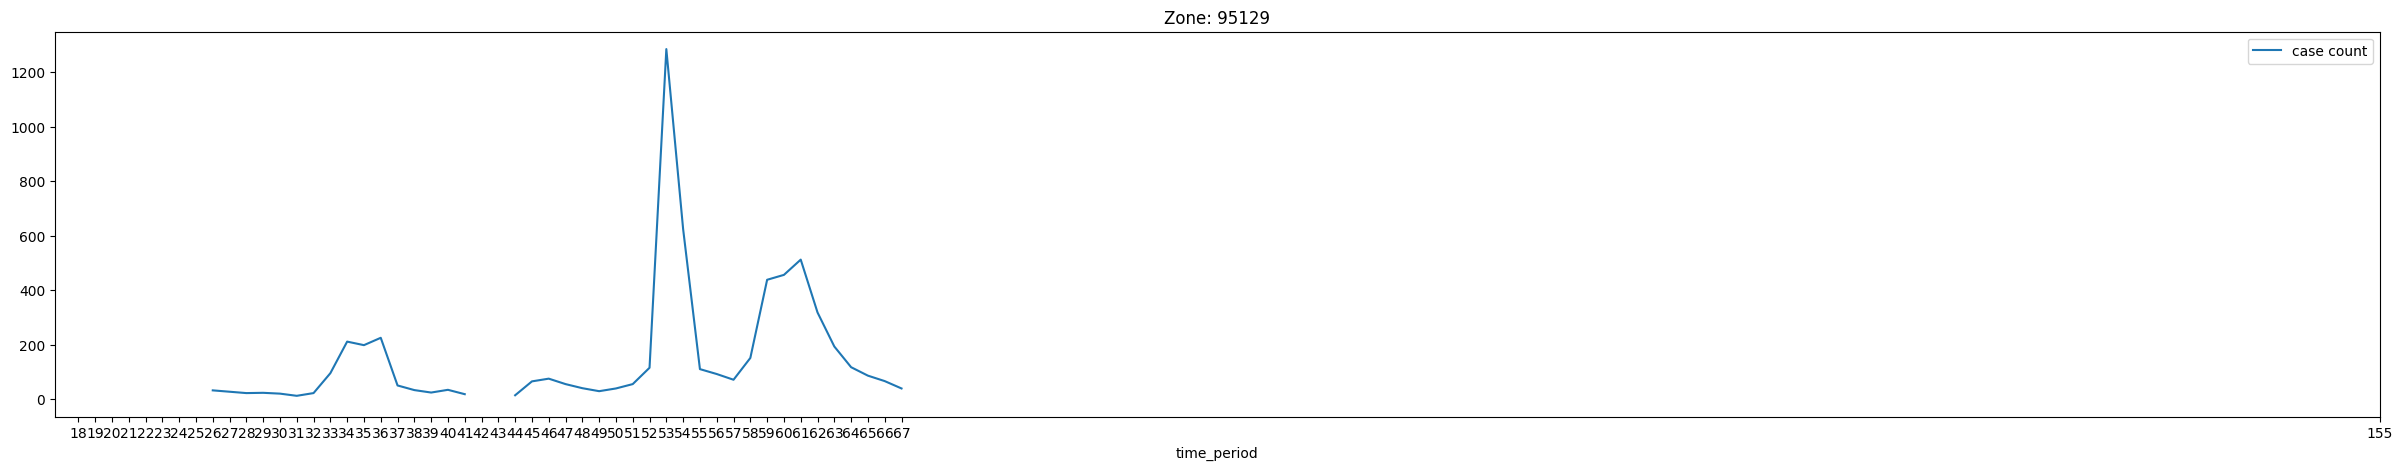

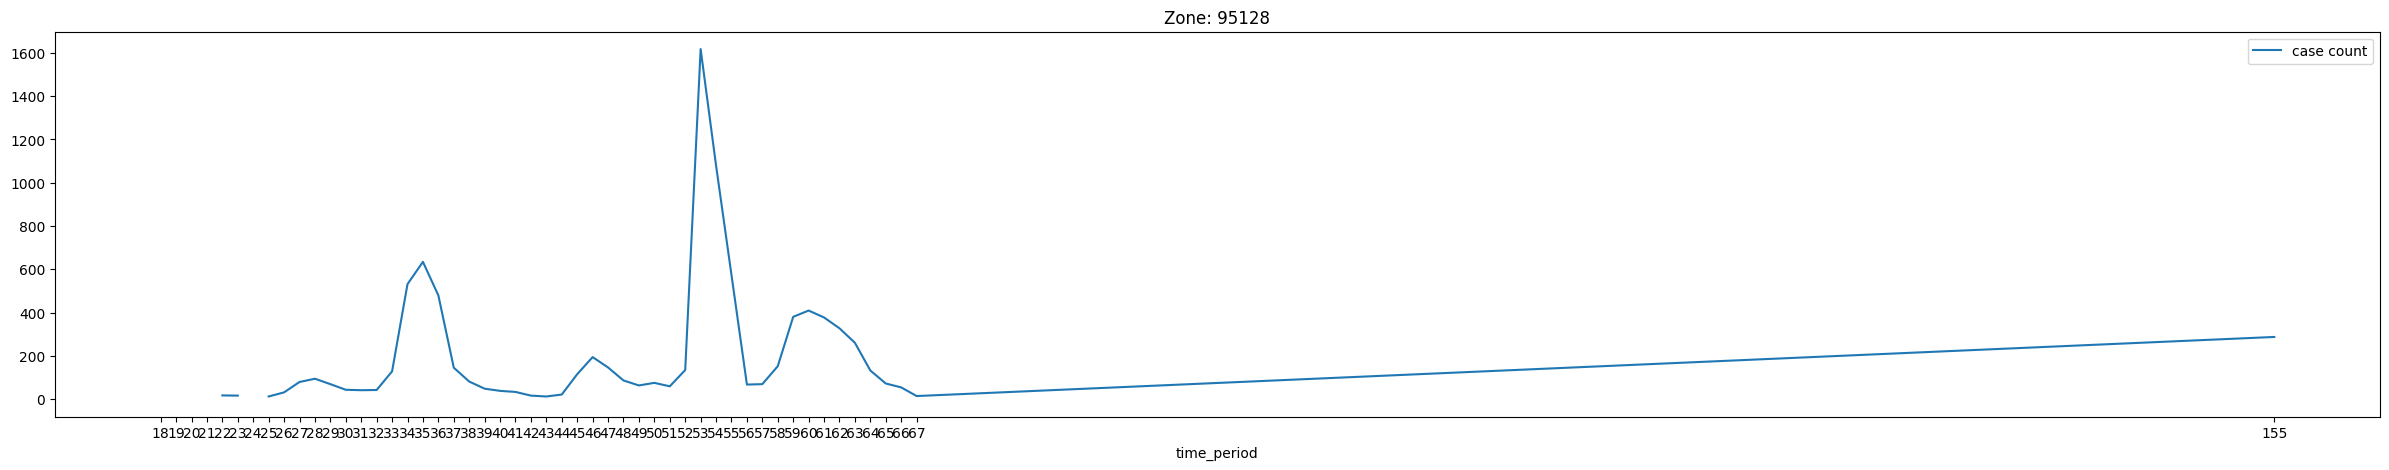

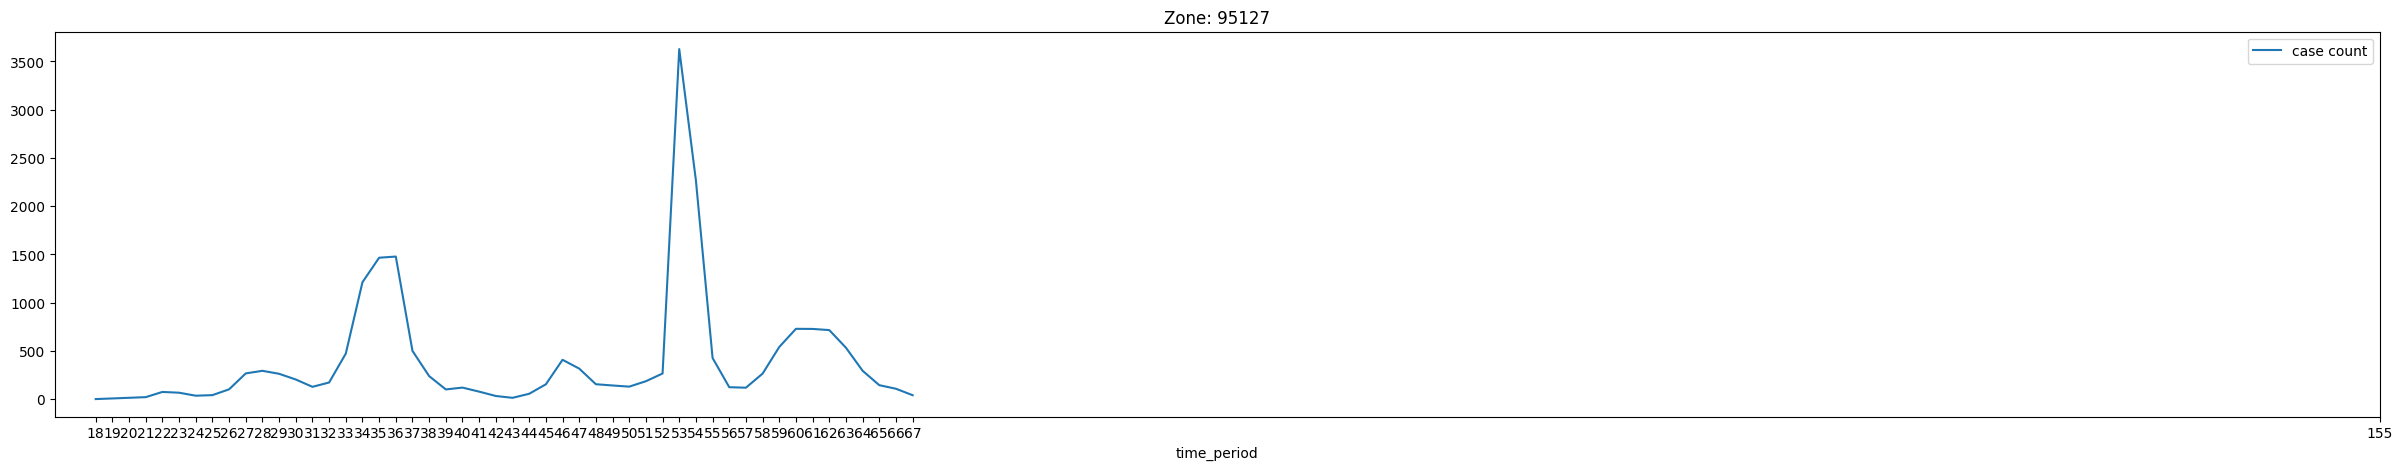

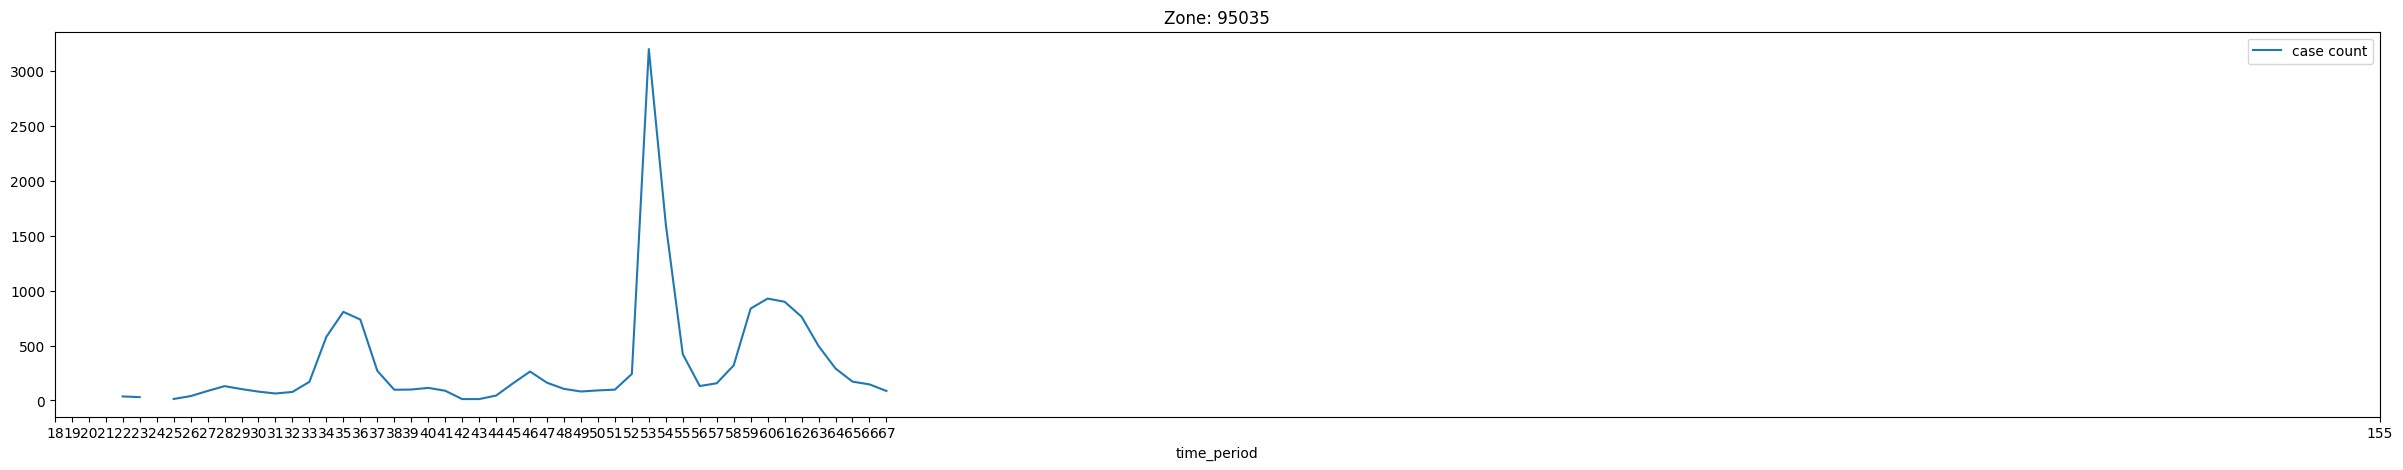

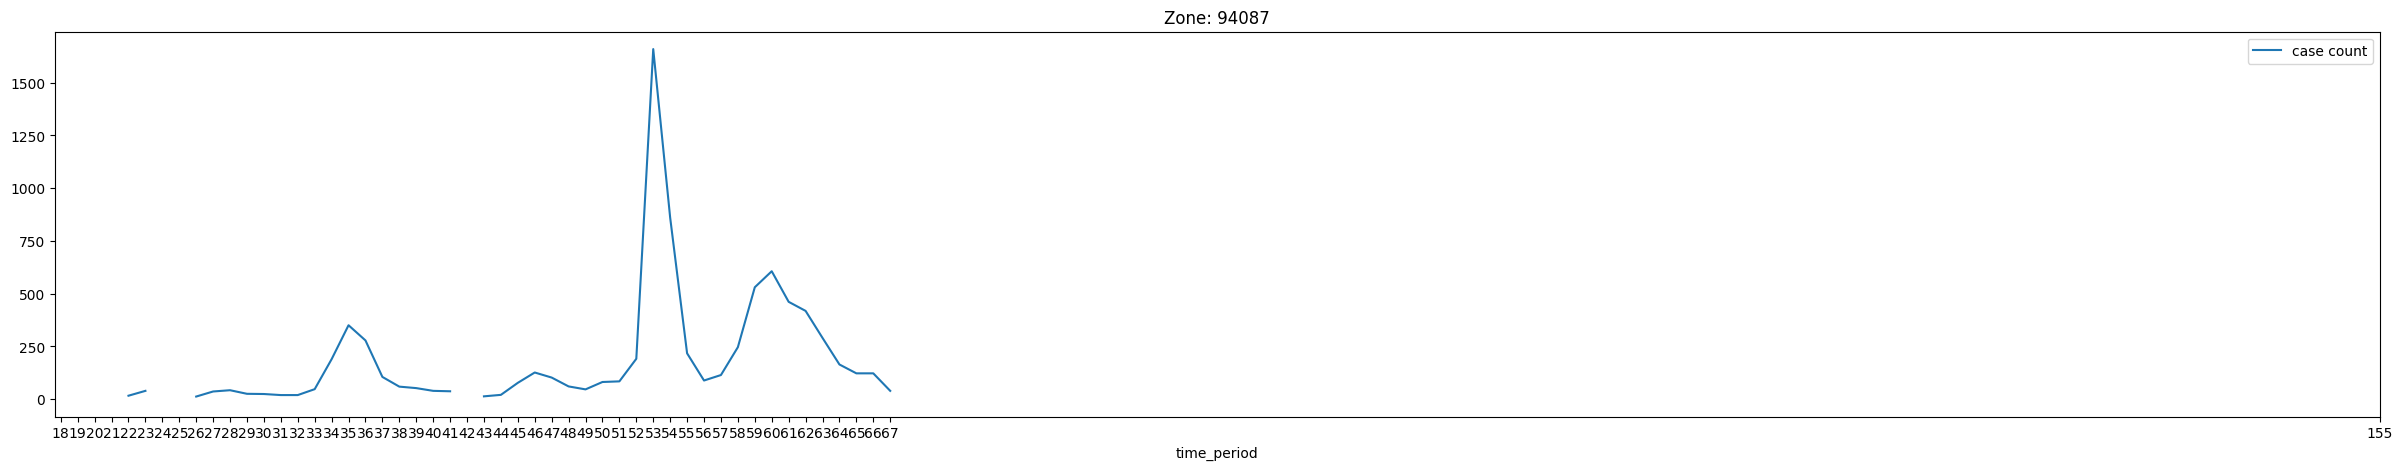

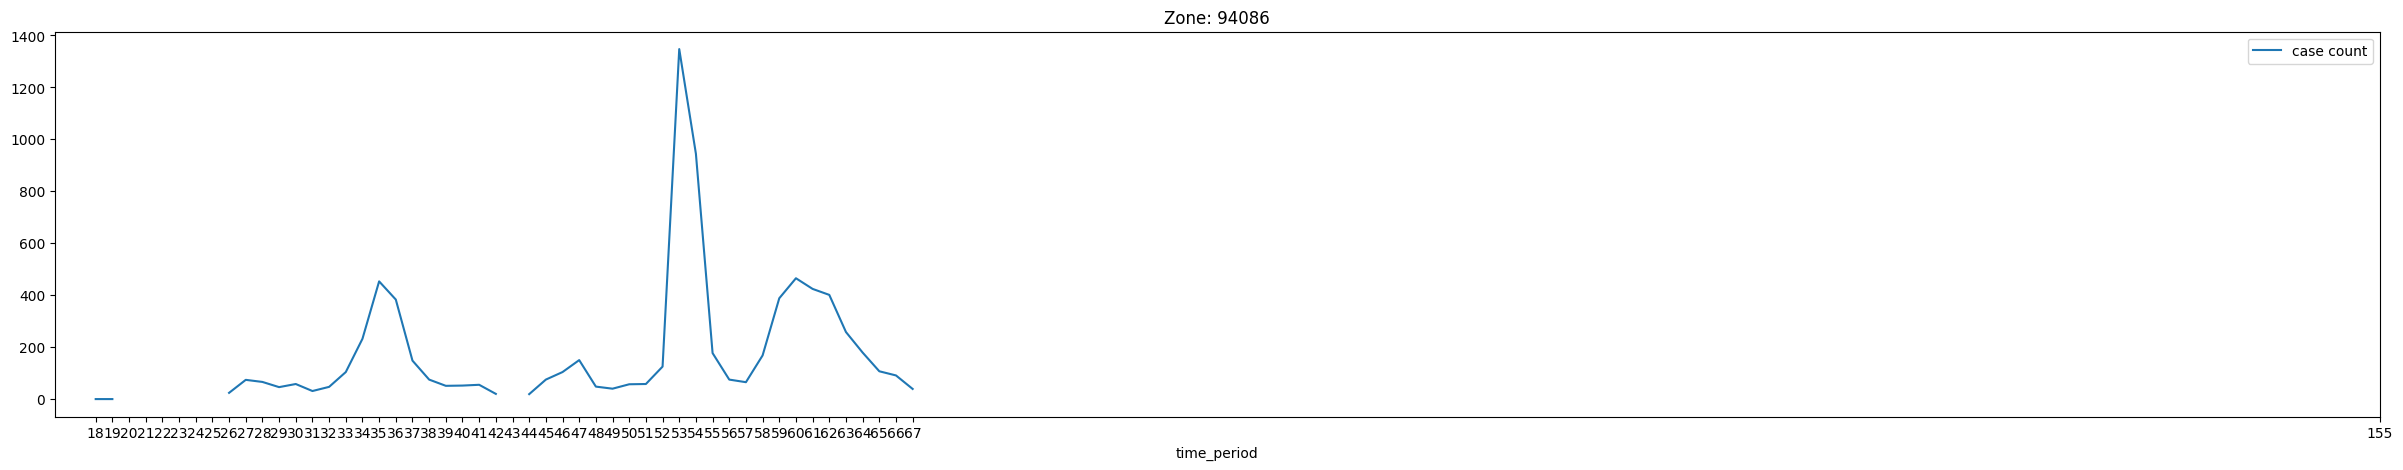

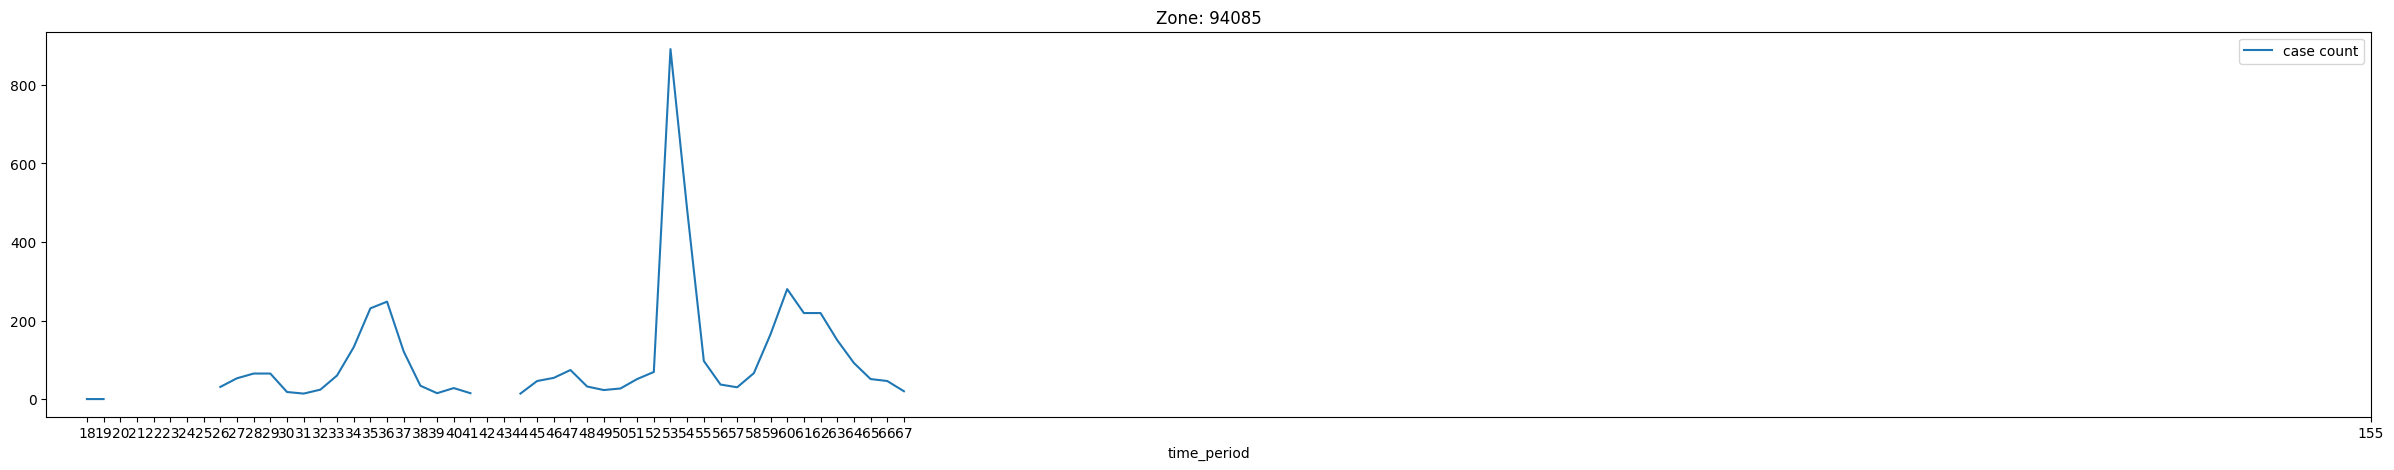

In [27]:
def line_chart_all_zones(dataset,attribute='case count'):
    time_periods = dataset['time_period'].unique()
    for zone in dataset['zcta'].unique():
        data = dataset.loc[dataset['zcta']==zone]
        data.sort_values(by='time_period').plot(x='time_period', y=f'{attribute}',figsize=(30,5),kind='line',legend=True,title=f'Zone: {zone}',xticks=time_periods)

line_chart_all_zones(dataset2,'case count')


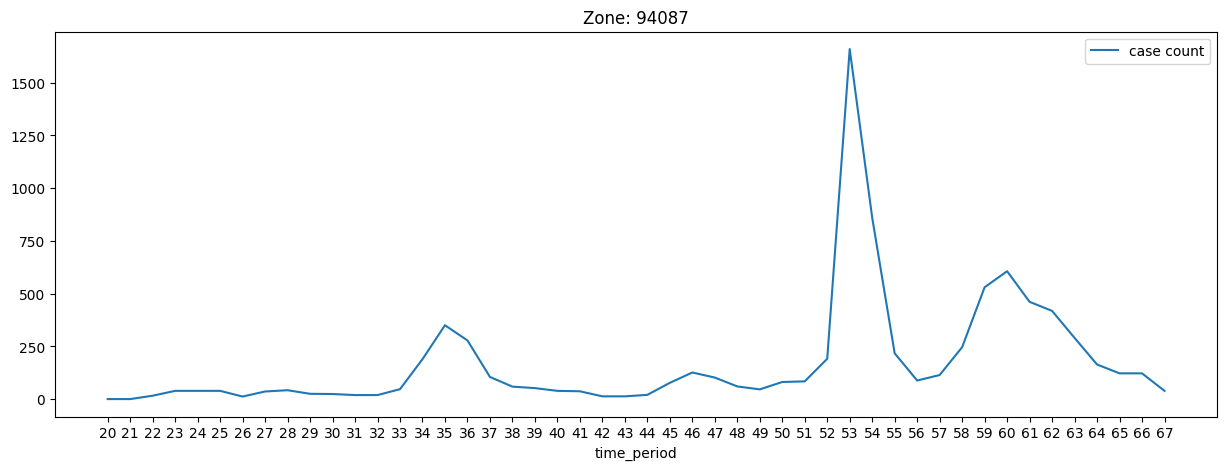

In [35]:
def line_chart_by_zone(dataset,zone,attribute='case count'):
    time_periods = dataset.loc[dataset['zcta']==zone]['time_period'].unique()
    data = dataset.loc[dataset['zcta']==zone]
    data.sort_values(by='time_period').plot(x='time_period', y=f'{attribute}',figsize=(15,5),kind='line',legend=True,title=f'Zone: {zone}',xticks=time_periods)

zone = 94087
line_chart_by_zone(dataset2,zone,'case count')

#### Traitement des valeurs manquantes

In [28]:
attributs=dataset2.columns
for attribut in attributs:
    nb_null=dataset2[attribut].isnull().sum()
    print(attribut, nb_null)

zcta 0
time_period 0
population 0
Start date 0
end date 0
case count 26
test count 12
positive tests 27
case rate 0
test rate 0
positivity rate 0


We chose Decision Tree Regressor to approximate Nan values

In [29]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

attributs_null = ['case count', 'test count', 'positive tests']

features = ['zcta','time_period','population']  # Add other relevant features
for target_column in attributs_null:
    # Split the dataset2 into two sets: one with missing values and one without
    data_missing = dataset2[dataset2[target_column].isnull()]
    data_not_missing = dataset2.dropna(subset=[target_column])

    # Split the dataset2 with missing values into features and target
    X_train = data_not_missing[features]
    y_train = data_not_missing[target_column]

    # Train a decision tree model
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predict the missing values
    X_missing = data_missing[features]
    predicted_values = model.predict(X_missing)

    # Fill in the missing values in the original dataset2
    dataset2.loc[dataset2[target_column].isnull(), target_column] = predicted_values


In [30]:
dataset2.isnull().sum()

zcta               0
time_period        0
population         0
Start date         0
end date           0
case count         0
test count         0
positive tests     0
case rate          0
test rate          0
positivity rate    0
dtype: int64

In [31]:
dataset2

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,2020-10-11,2020-10-31,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,2021-05-30,2021-06-19,12.0,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,2021-03-28,2021-04-17,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2022-02-06,2022-02-26,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,2021-06-20,2021-07-10,14.0,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,2022-05-01,2022-05-21,165.0,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,2022-07-24,2022-08-13,150.0,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,2022-06-12,2022-07-02,219.0,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,2020-06-28,2020-07-18,53.0,1379.0,61.0,10.9,282.8,4.4


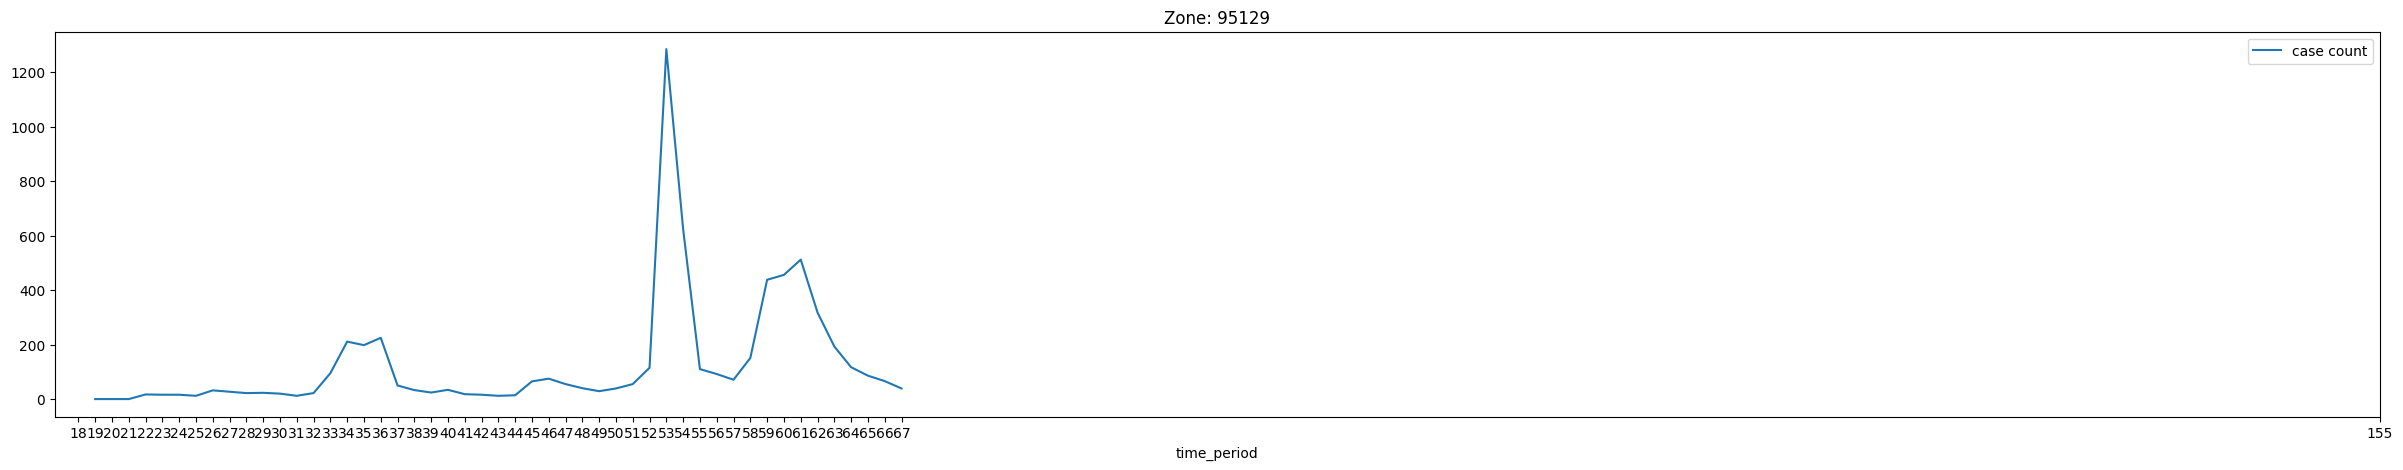

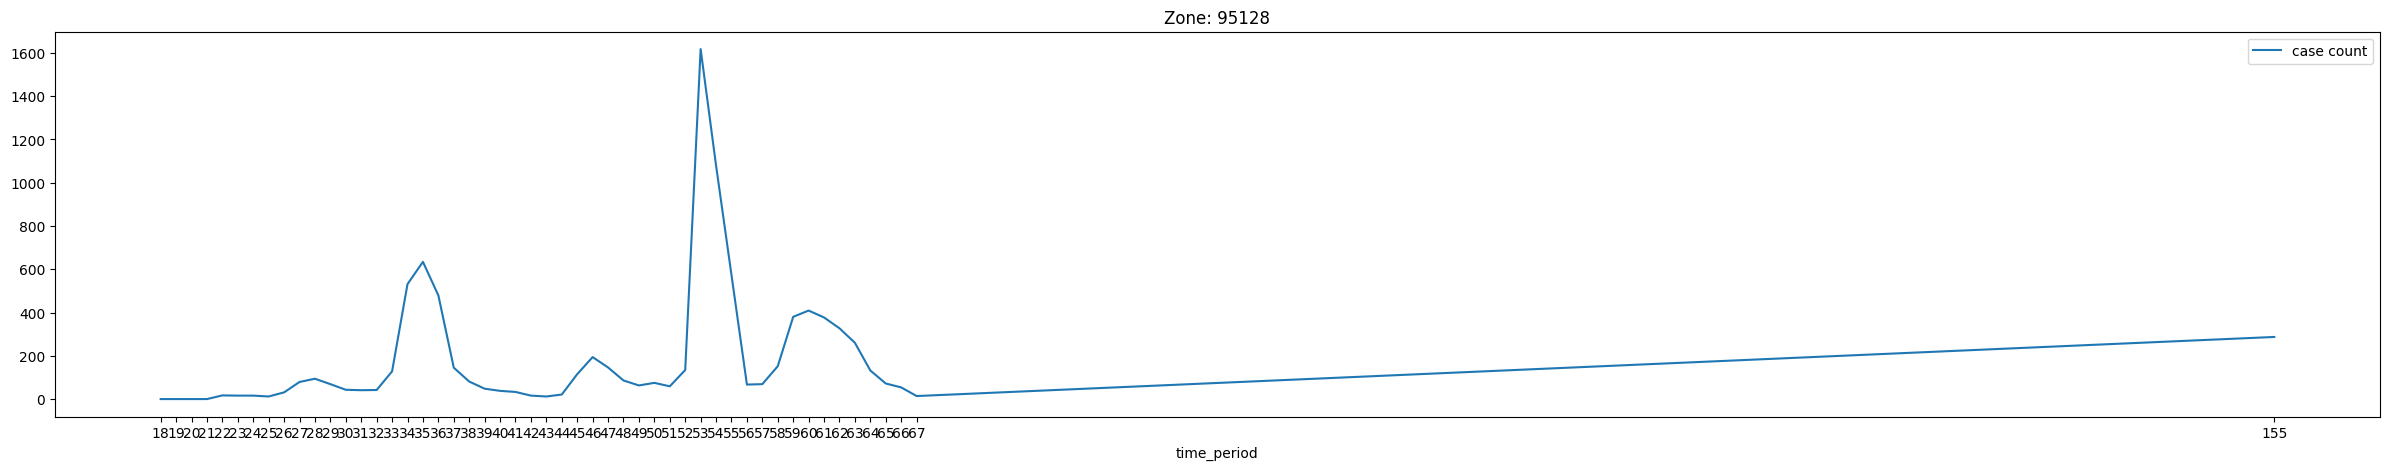

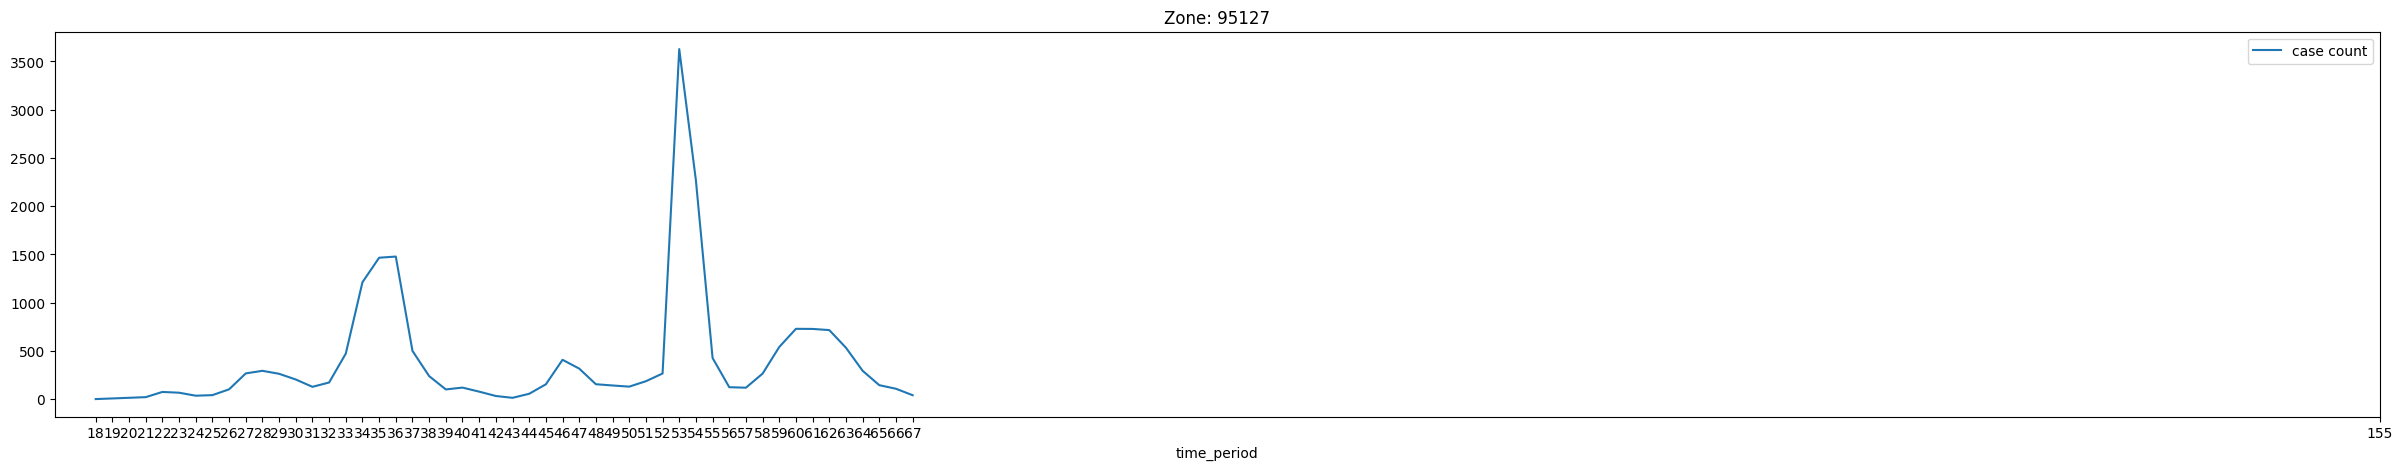

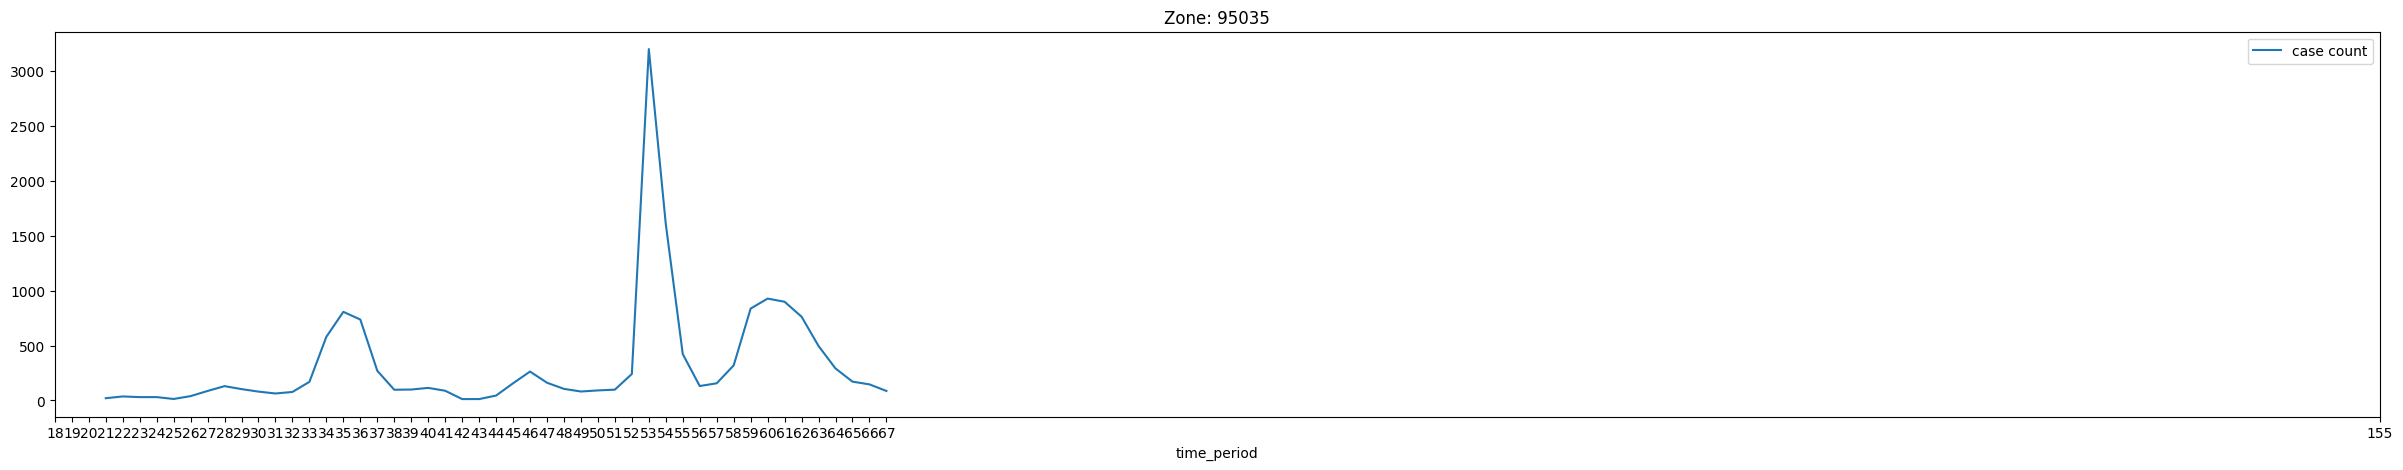

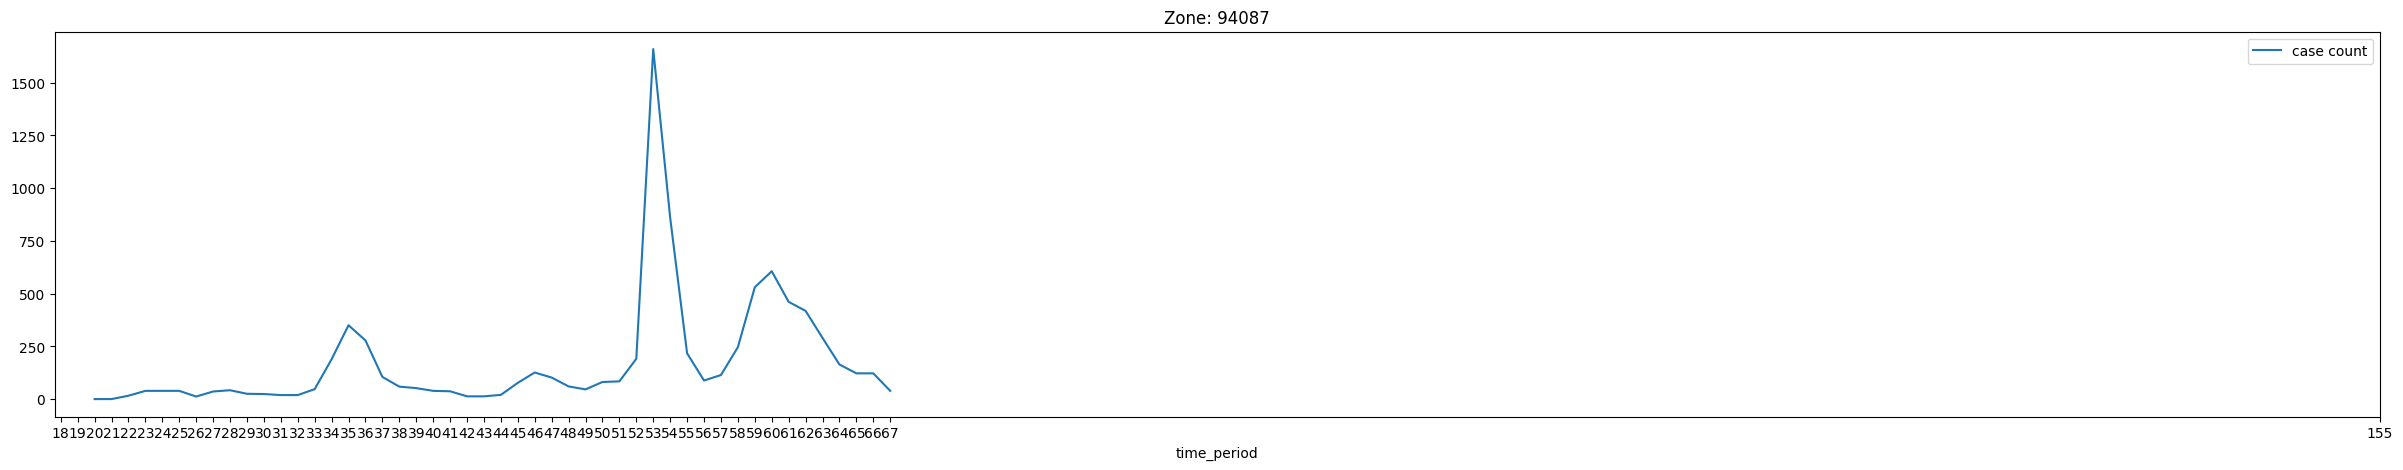

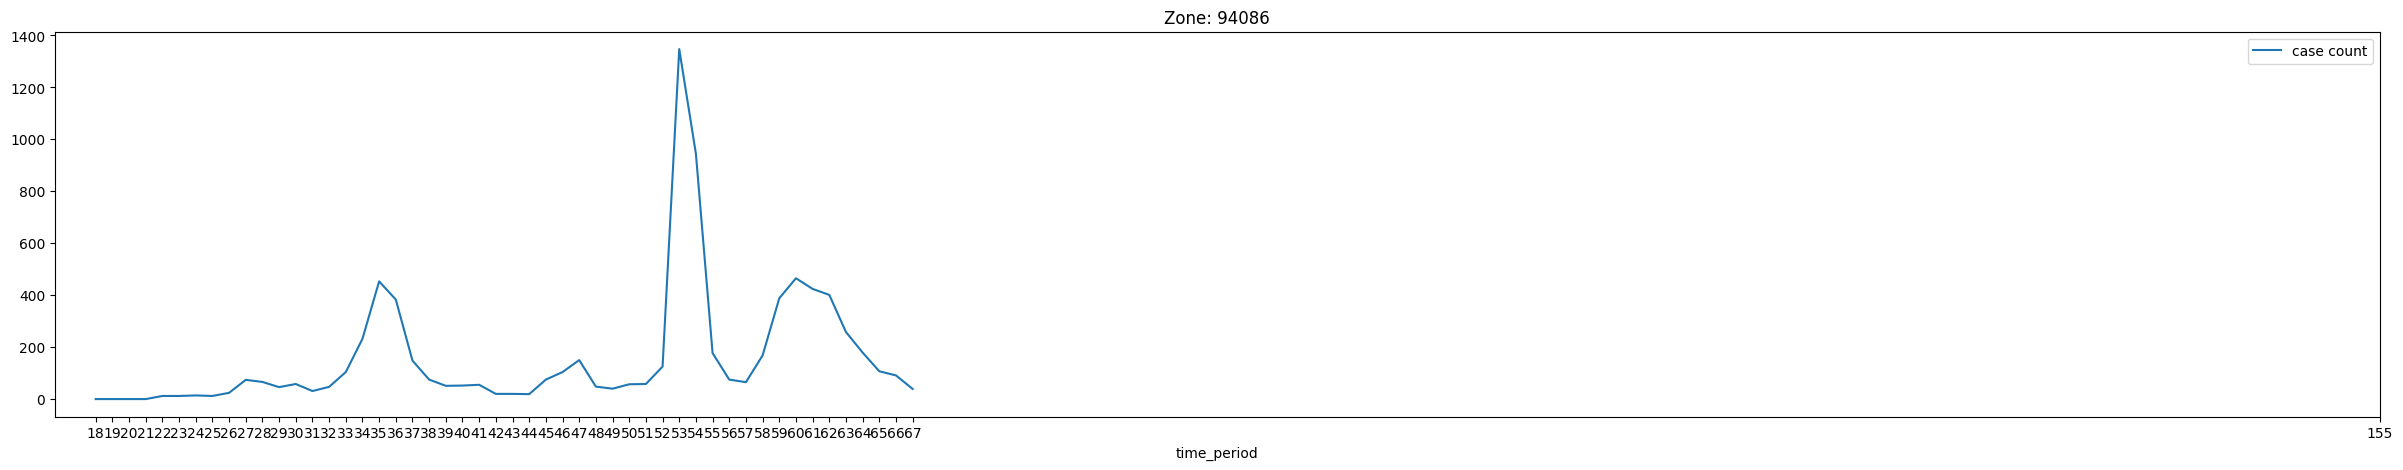

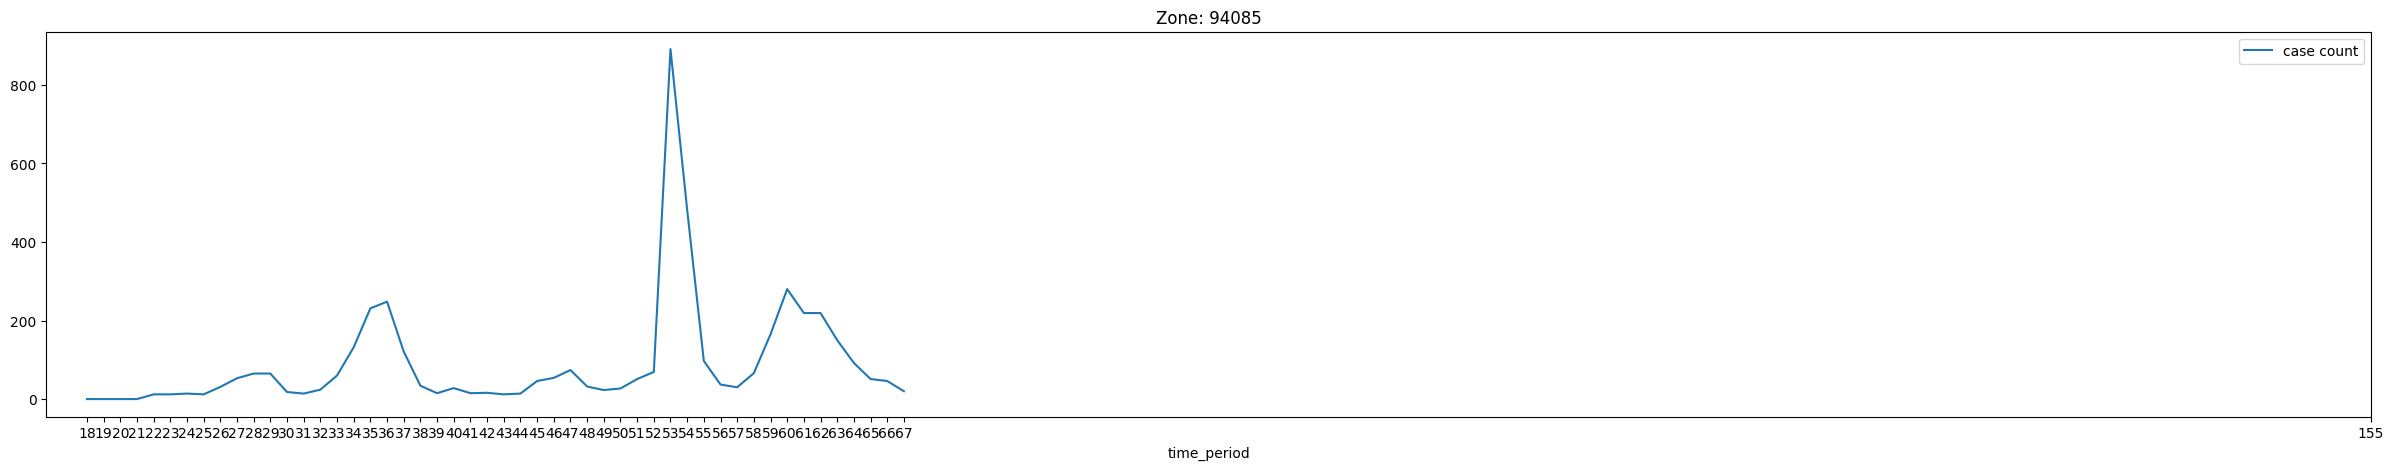

In [33]:
line_chart_all_zones(dataset2,'case count')

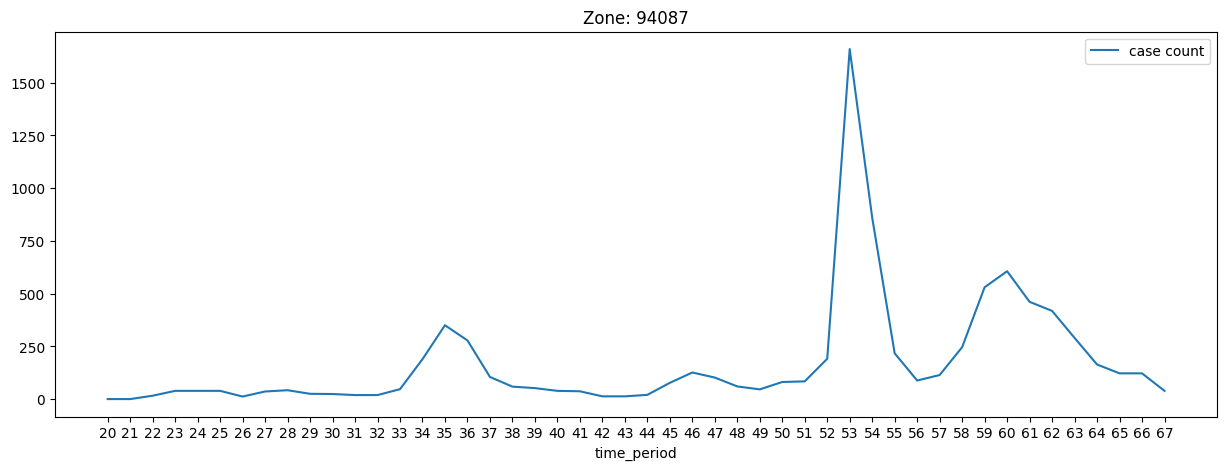

In [36]:
zone = 94087
line_chart_by_zone(dataset2,zone,'case count')

#### traitement des valeurs aberrantes

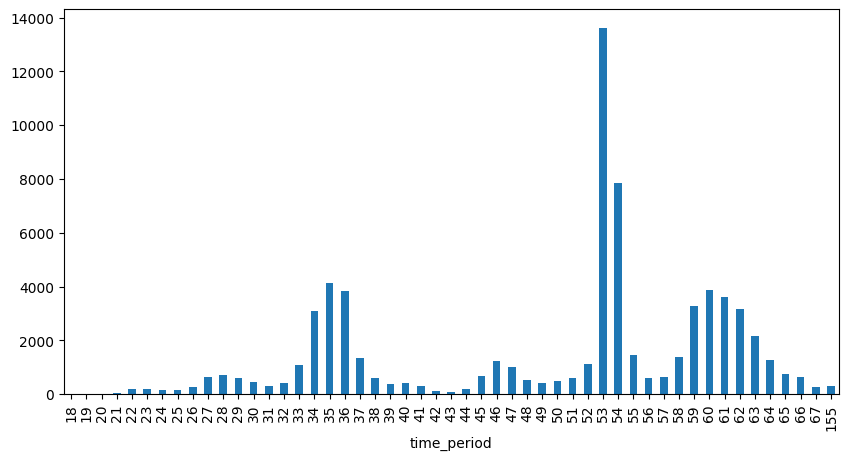

In [136]:
def bar_plot_all_zones(dataset,attribute='case count'):
    dataset.sort_values(by='Start date').groupby('time_period')[attribute].sum().plot(x='time_period', y=f'{attribute}',figsize=(10,5),kind='bar')

bar_plot_all_zones(dataset2,'case count')

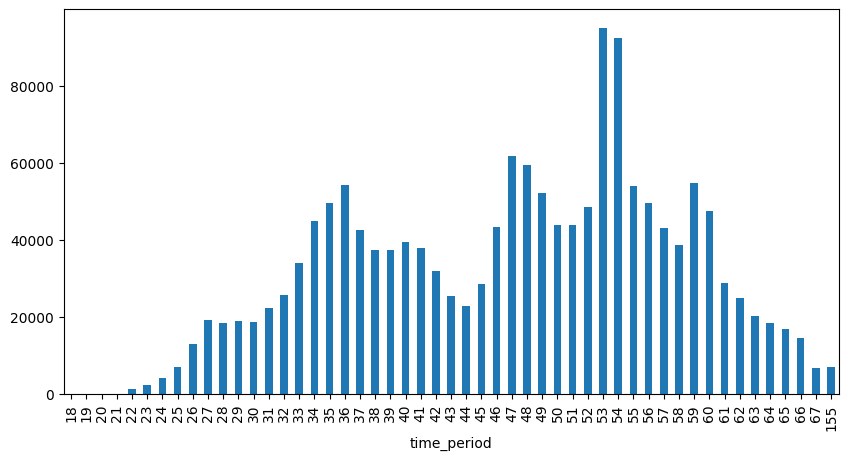

In [137]:
bar_plot_all_zones(dataset2,'test count')

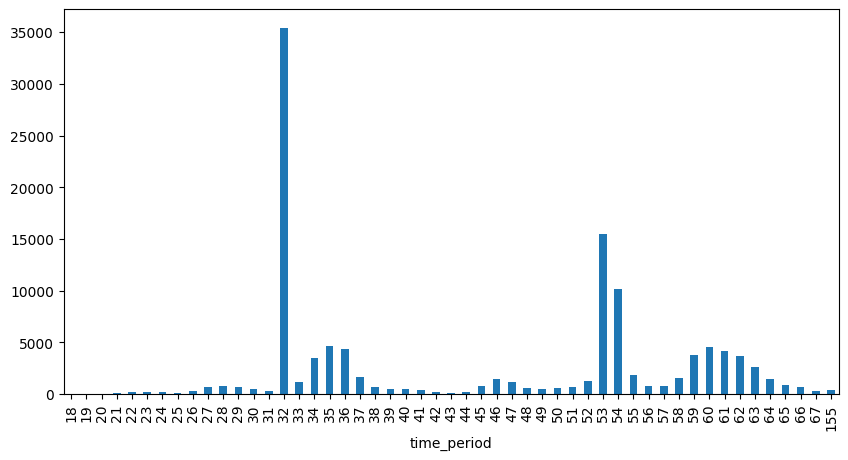

In [138]:
bar_plot_all_zones(dataset2,'positive tests')

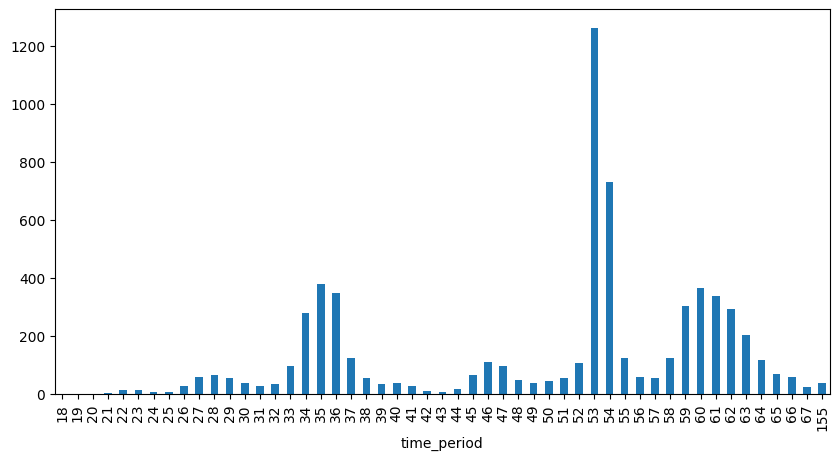

In [139]:
bar_plot_all_zones(dataset2,'case rate')

In [37]:
dataset2.loc[
    (dataset2['case count'] < 0) |
    (dataset2['test count'] < 0) |
    (dataset2['positive tests'] < 0) |
    (dataset2['case rate'] < 0) |
    (dataset2['test rate'] < 0)
]


,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate


In [38]:
dataset2 = dataset2.drop(dataset2.loc[dataset2['time_period'] == 20].index)
dataset2 = dataset2.drop(dataset2.loc[dataset2['time_period'] == 155].index)

In [39]:
for i, x in dataset2.iterrows():
    if x['case count'] <=  0:
        if x['positive tests'] > 0:
            dataset2.at[i,'case count'] = dataset2.loc[i,'positive tests']

    if x['positive tests'] <= 0:
        if x['case count'] > 0:
            dataset2.at[i,'positive tests'] = dataset2.loc[i,'case count']
    
    if x['case rate'] <= 0:
        if x['positivity rate'] > 0:
            dataset2.at[i,'case rate'] = dataset2.loc[i,'positivity rate']

In [40]:
def IQR_method(data):
    for column in data.columns[1:]:
        IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
        r = 1.5 * IQR
        lower_bound = data[column].quantile(0.25) - r
        upper_bound = data[column].quantile(0.75) + r
        data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = data[column].median()
    return data


In [41]:
dataset2=IQR_method(dataset2)

In [42]:
dataset2.to_csv('new_dataset_2.csv', index=False)

### Visualisation:

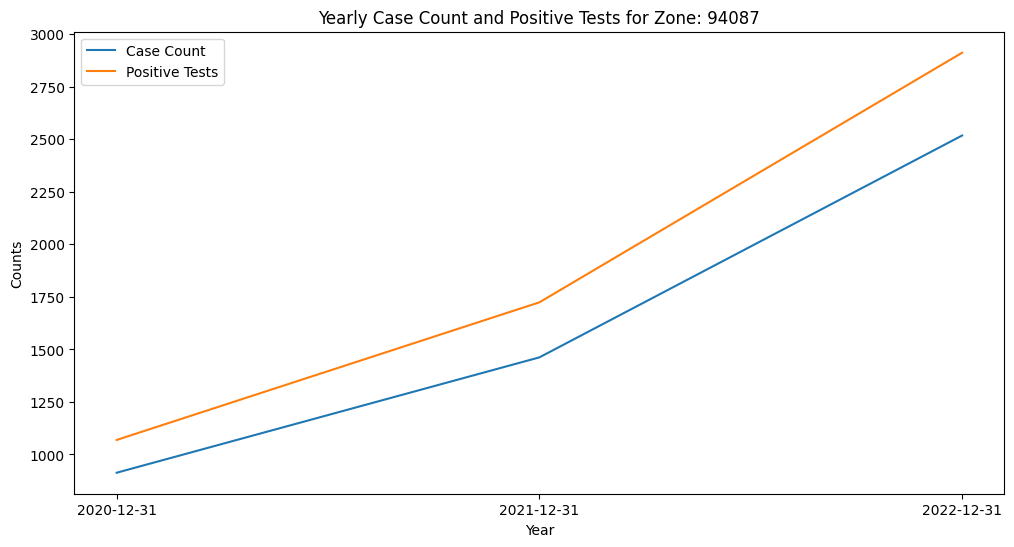

In [145]:
import matplotlib.pyplot as plt

def line_chart_yearly_zone(dataset,zone):
    data= dataset[dataset['zcta']==zone]
    data=pd.DataFrame(data)
    # Your previous code...
    sorted_data = data.sort_values(by='Start date')
    yearly_data = sorted_data.resample('Y', on='Start date')[['case count', 'positive tests']].sum()

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_data.index, yearly_data['case count'], label='Case Count')
    plt.plot(yearly_data.index, yearly_data['positive tests'], label='Positive Tests')

    plt.xlabel('Year')
    plt.ylabel('Counts')
    plt.xticks(yearly_data.index)
    plt.title('Yearly Case Count and Positive Tests for Zone: 94087')
    plt.legend()
    plt.savefig('./assets_2/yearly_case_count_and_positive_tests.png')
    plt.show()
    yearly_data.index

zone = 94087
line_chart_yearly_zone(dataset2,zone)


In [3]:
import matplotlib.pyplot as plt

def line_chart_monthly_zone(dataset,zone):
    data= dataset[dataset['zcta']==zone]
    sorted_data = data.sort_values(by='Start date')
    monthly_data = sorted_data.resample('M', on='Start date')[['case count', 'positive tests']].sum()

    # Plotting
    plt.figure(figsize=(20, 6))
    plt.plot(monthly_data.index, monthly_data['case count'], label='Case Count')
    plt.plot(monthly_data.index, monthly_data['positive tests'], label='Positive Tests')

    plt.xlabel('Year')
    plt.ylabel('Counts')
    plt.title('monthly Case Count and Positive Tests for Zone: 94087')
    plt.legend()
    plt.savefig('./assets_2/monthly_case_count_and_positive_tests.png')
    plt.show()

zone = 94087
line_chart_monthly_zone(dataset2,zone)

NameError: name 'dataset2' is not defined

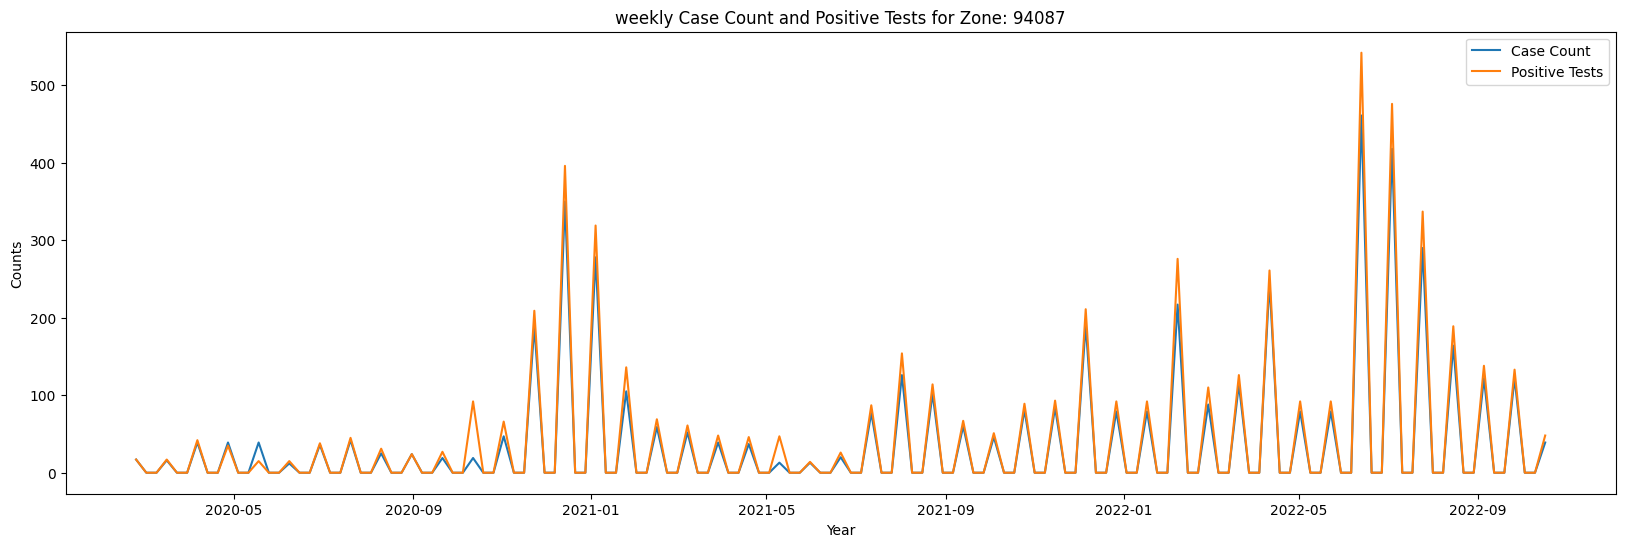

In [147]:
import matplotlib.pyplot as plt

def line_chart_weekly_zone(dataset,zone):
    data= dataset[dataset['zcta']==zone]
    sorted_data = data.sort_values(by='Start date')
    weekly_data = sorted_data.resample('W-Mon', on='Start date')[['case count', 'positive tests']].sum()

    # Plotting
    plt.figure(figsize=(20, 6))
    plt.plot(weekly_data.index, weekly_data['case count'], label='Case Count')
    plt.plot(weekly_data.index, weekly_data['positive tests'], label='Positive Tests')

    plt.xlabel('Year')
    plt.ylabel('Counts')
    plt.title('weekly Case Count and Positive Tests for Zone: 94087')
    plt.legend()
    plt.savefig('./assets_2/weekly_case_count_and_positive_tests.png')
    plt.show()

zone= 94087
line_chart_weekly_zone(dataset2,zone)



In [148]:
import plotly.express as px

dataset2.loc[:, 'zcta'] = dataset2['zcta'].astype('str')
def distribution_year_per_zone(data):
    grouped_data = data.groupby('zcta')[['case count','positive tests']].sum().reset_index()
    fig=px.bar(grouped_data, x='zcta', y=['case count','positive tests'], barmode='group', 
                        labels={'zcta': 'zone', 'value': 'nombre total', 'variable': 'Attribut'},
                        title='Distribution du nombre total des cas confirmés et tests positifs par zones')
    fig.update_layout(width=900, height=600)
    fig.write_image('./assets_2/case_pos_tests_ditribution.png')
    fig.show()

distribution_year_per_zone(dataset2)

In [149]:
import plotly.express as px

def heatmap_zone(data):
    grouped_data = data.groupby('zcta')[['case count', 'positive tests']].sum().reset_index()

    fig = px.imshow(grouped_data[['case count', 'positive tests']].T,
                    labels=dict(x="zone", y="Attribut", color="nombre total"),
                    x=grouped_data['zcta'],
                    y=['case count', 'positive tests'],
                    color_continuous_scale='Viridis',
                    title='Distribution du nombre total des cas confirmés et tests positifs par zones')

    fig.update_xaxes(title_text='Zone')
    fig.update_yaxes(title_text='Attribut')
    fig.update_layout(width=900, height=600)
    fig.write_image('./assets_2/case_pos_tests_heatmap.png')
    fig.show()

heatmap_zone(dataset2)


In [150]:
def distribution_year_per_zone(data):
    data_with_year = data.copy()
    data_with_year['year']=data_with_year['Start date'].dt.year
    data_with_year['year']= data_with_year['year'].astype('str')
    grouped_data = data_with_year.groupby(['zcta','year'])['case count'].sum().reset_index()
    fig = px.bar(grouped_data, x='zcta', y='case count', color='year')
    fig.update_layout(width=1000, height=600,title='Distribution cas Covid positifs par zone et par année')
    fig.write_image('Distribution_cas_Covid_positifs_par_zone_année.png')
    fig.show()

distribution_year_per_zone(dataset2)

In [151]:
def population_test(data):
    fig = px.scatter(data, x='population', y='test count')
    fig.update_layout(width=1000, height=600,title='Relation entre la population et le nombre de tests')
    fig.show()
population_test(dataset2)

In [152]:
import plotly.express as px

def population_test_heatmap(data):
    fig = px.density_heatmap(data, x='population', y='test count', title='Population vs Test Count Heatmap')
    fig.update_layout(width=1000, height=600)
    fig.write_image('./assets_2/population_test_heatmap.png')
    fig.show()

population_test_heatmap(dataset2)


In [153]:
import plotly.graph_objects as go

def population_test_secteur(data): 
    # Données de population et de tests effectués (à titre d'exemple)
    grouped_data= data.groupby('zcta')[['population','test count']].sum()
    population = grouped_data['population']
    test_counts = grouped_data['test count']
    labels = grouped_data.index

    # Création du diagramme en secteurs
    fig = go.Figure()

    # Ajout des secteurs pour la population et les tests effectués
    for i in range(len(population)):
        fig.add_trace(go.Pie(
            labels=['Population', 'Tests Count'],
            values=[population[i], test_counts[i]],
            name=labels[i],
            hole=0.5,
            marker=dict(colors=['blue', 'orange']),
            domain={"row": 0, "column": i}
        ))

    # Update layout
    fig.update_layout(
        title='Proportional Pie Chart of Population vs Test Counts by Zone',
        grid={'rows': 1, 'columns': len(population)},
        height=500
    )

    # Show the chart
    fig.show()

population_test_secteur(dataset2)


In [154]:
def population_test_bar_plot(data):
    fig = px.bar(data, x='population', y='test count')
    fig.update_layout(width=1000, height=600,title='Relation entre la population et le nombre de tests')
    fig.show()
population_test_bar_plot(dataset2)

In [155]:
def max_5_zones(data):
    fig = px.scatter(data, x='time_period', y='case count', color='zcta', size='positive tests',
                 title='Comparison of Case Count vs Positive Tests',
                 hover_data=['zcta', 'population', 'Start date', 'end date'])
    fig.show()

max_5_zones(dataset2)


In [156]:
import plotly.express as px

def top_5_zones_bar_plot(data):
    top_5_zones = data.groupby('zcta')['case count'].sum().nlargest(5).reset_index()
    top_5_zones['zcta']=top_5_zones['zcta'].astype('str')
    fig = px.bar(top_5_zones, x='zcta', y='case count', 
                labels={'zcta': 'Zone', 'case count': 'Total Cases'},
                title='Top 5 Zones Most Affected by COVID-19')
    fig.update_layout(width=1000, height=600)
    fig.write_image('./assets_2/top_5_zones.png')
    fig.show()

top_5_zones_bar_plot(dataset2)


In [157]:
import plotly.express as px

def case_test_pos_test_relationship_per_period(data,period):
    dataset = data.loc[data['time_period'] == period]
    fig = px.bar(dataset, x='zcta', y=['case count', 'test count', 'positive tests'], 
                labels={'value': 'Count'},barmode='group', 
                title='Relationship between Confirmed Cases, Tests Conducted, and Positive Tests Over Time')

    fig.write_image('./assets_2/relationship_between_confirmed_cases_tests_conducted_and_positive_tests_over_time.png')

    fig.show()

period=26
case_test_pos_test_relationship_per_period(dataset2,period)

In [158]:
fig = px.line(dataset2.sort_values(by='Start date'), x='Start date', y='case count', color='zcta', title='Case Count Trend Over Time by Zone')
fig.show()


In [160]:
import plotly.graph_objs as go
import plotly.express as px

def case_count_test_positive(data,zone):
    df=data.sort_values(by='Start date')
    selected_zone = df[df['zcta'] == zone]

    # Create a line chart for confirmed cases, tests conducted, and positive tests over time
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=selected_zone['Start date'], y=selected_zone['case count'],
                            mode='lines', name='Confirmed Cases'))

    fig.add_trace(go.Scatter(x=selected_zone['Start date'], y=selected_zone['test count'],
                            mode='lines', name='Tests Conducted'))

    fig.add_trace(go.Scatter(x=selected_zone['Start date'], y=selected_zone['positive tests'],
                            mode='lines', name='Positive Tests'))

    # Update layout and labels
    fig.update_layout(title='Rapport entre les cas confirmés, tests effectués et tests positifs au fil du temps',
                    xaxis_title='Date', yaxis_title='Nombre',
                    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

    fig.show()

case_count_test_positive(dataset2,'95035')


In [28]:
data = pd.read_csv('new_Dataset_2.csv')
data['Start date']= pd.to_datetime(data['Start date'])
data['end date']= pd.to_datetime(data['end date'])



In [31]:
import plotly.graph_objs as go
def weekly_traces_per_zone(data,zone):
    data = data[data['zcta'] == zone]
    sorted_data = data.sort_values(by='Start date')
    monthly_data = sorted_data.resample('W-Mon', on='Start date')[['case count', 'positive tests']].sum()

    # Create traces for Case Count and Positive Tests
    trace_case_count = go.Scatter(x=monthly_data.index, y=monthly_data['case count'], mode='lines', name='Case Count')
    trace_positive_tests = go.Scatter(x=monthly_data.index, y=monthly_data['positive tests'], mode='lines', name='Positive Tests')

    # Layout settings
    layout = go.Layout(
        title=f'weekly Case Count and Positive Tests for Zone: {zone}',
        xaxis=dict(title='Months'),
        yaxis=dict(title='Counts'),
        legend=dict(x=0, y=1) 
    )
    fig = go.Figure(data=[trace_case_count, trace_positive_tests], layout=layout)
    return fig
def yearly_traces_per_zone(data,zone):
    data = data[data['zcta'] == zone]
    sorted_data = data.sort_values(by='Start date')
    monthly_data = sorted_data.resample('Y', on='Start date')[['case count', 'positive tests']].sum()

    # Create traces for Case Count and Positive Tests
    trace_case_count = go.Scatter(x=monthly_data.index, y=monthly_data['case count'], mode='lines', name='Case Count')
    trace_positive_tests = go.Scatter(x=monthly_data.index, y=monthly_data['positive tests'], mode='lines', name='Positive Tests')

    # Layout settings
    layout = go.Layout(
        title=f'Yearly Case Count and Positive Tests for Zone: {zone}',
        xaxis=dict(title='Years'),
        yaxis=dict(title='Counts'),
        legend=dict(x=0, y=1) 
    )
    fig = go.Figure(data=[trace_case_count, trace_positive_tests], layout=layout)
    return fig

def periodic_traces_per_zone(data=data,zone=94087,period='yearly'):
    if period == 'weekly':
        fig = weekly_traces_per_zone(data,zone)
        fig.show()
    elif period == 'yearly':
        fig = yearly_traces_per_zone(data,zone)
        fig.show()

periodic_traces_per_zone(data=data,zone=94087,period='weekly')